In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import networkx as nx
import numpy as np
import random

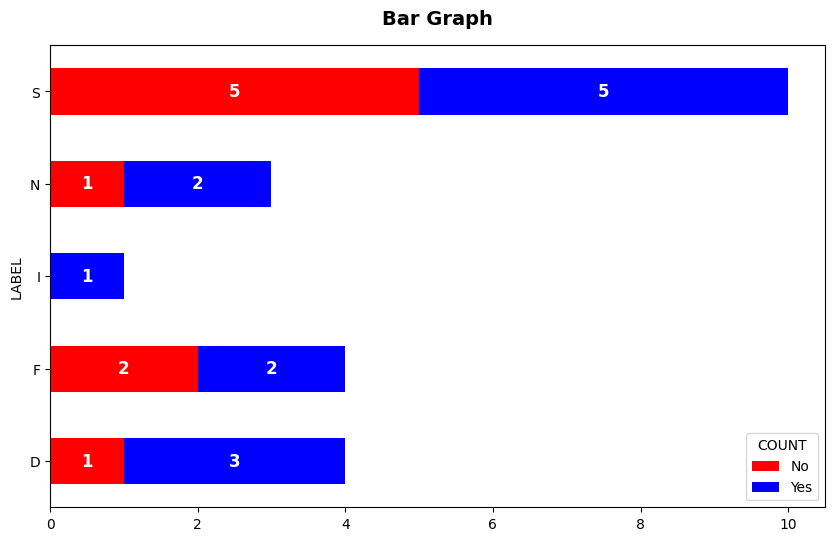

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
bar_df = pd.read_csv("bar_assignment.csv")

# Map binary values to labels
bar_df['COUNT'] = bar_df['COUNT'].map({1: 'Yes', 0: 'No'})

# Pivot table for stacked bar chart
bar_pivot = bar_df.pivot_table(index='LABEL', columns='COUNT', aggfunc='size', fill_value=0)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot stacked horizontal bar chart
bar_pivot.plot(kind='barh', stacked=True, color={'Yes': 'blue', 'No': 'red'}, ax=ax)

# Add title at the top
ax.set_title("Bar Graph", fontsize=14, fontweight='bold', pad=15)

# Add number labels inside the bars
for index, (label, row) in enumerate(bar_pivot.iterrows()):
    yes_value = row.get('Yes', 0)
    no_value = row.get('No', 0)

    # Label for "No" section (Red)
    if no_value > 0:
        ax.text(no_value / 2, index, str(no_value), va='center', ha='center',
                color='white', fontsize=12, fontweight='bold')

    # Label for "Yes" section (Blue)
    if yes_value > 0:
        ax.text(no_value + (yes_value / 2), index, str(yes_value), va='center', ha='center',
                color='white', fontsize=12, fontweight='bold')

# Show the plot
plt.show()


In [30]:
import plotly.graph_objects as go
import pandas as pd

# Load dataset
sankey_df = pd.read_csv("sankey_assignment.csv")

# Function to get the distance value between nodes
def find_distance_sankey(mid, target):
    global sankey_df
    return sankey_df.loc[sankey_df['LABEL'] == mid, target].values[0]

# Extract node categories
start = list(sankey_df.columns[1:9])  # Source Nodes
middle = list(sankey_df['LABEL'].unique())  # Intermediate Nodes
end = list(sankey_df.columns[9:])  # Target Nodes

# Create full node list
node_labels = start + middle + end

# Mapping nodes to indices
node_indices = {x: i for i, x in enumerate(node_labels)}

# Initialize Sankey link lists
source = []
target = []
value = []

# Get values from source to intermediate nodes
for s in start:
    for m in middle:
        dist = find_distance_sankey(m, s)
        if dist > 0:
            source.append(node_indices[s])
            target.append(node_indices[m])
            value.append(dist)

# Get values from intermediate to target nodes
for e in end:
    for m in middle:
        dist = find_distance_sankey(m, e)
        if dist > 0:
            source.append(node_indices[m])
            target.append(node_indices[e])
            value.append(dist)

# Define color mapping for nodes
colors = [
    '#FFA07A', # PS
    '#20B2AA', # OMP
    '#FF8C00', # CNP
    '#FF6AB4', # NRP
    '#8FBC8F', # NMCCC
    '#02CED1', # PEC
    '#FFD701', # NCDM
    '#BA55D3', # RGS
    '#87CEFA', # S
    '#4782B4', # F
    '#5F9EA0', # D
    '#6395EC', # N 
    '#00BFFF', # I
    '#3CB371', # Reg
    '#97FB98', # Aca
    '#90EE8F'  # Oth
]

# Create Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15, thickness=20, line=dict(color="black", width=0.5),
        label=node_labels,
        color=colors
    ),
    link=dict(
        source=source,
        target=target, 
        value=value,
        color=[colors[s] for s in source]  # Assign link colors based on source
    )
)])

# Format Layout
fig.update_layout(
    title_text="Sankey Diagram",
    font_size=10
)

# Display the Sankey diagram
fig.show()


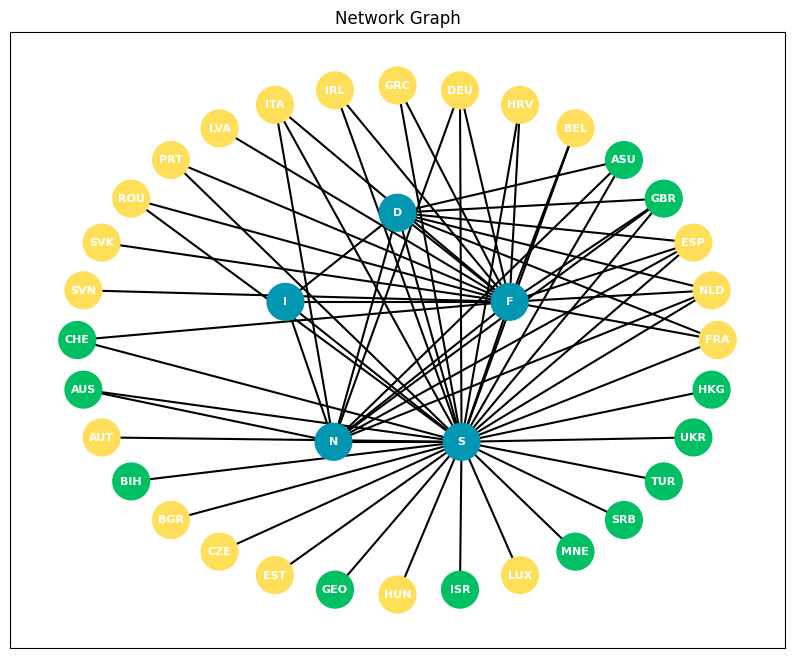

In [36]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
network_df = pd.read_csv("networks_assignment.to_csv")

# Define node categories
center_nodes = ['D', 'F', 'I', 'N', 'S']
green_nodes = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'ASU']  # Fixed ASU
yellow_nodes = ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 
                'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']

# Initialize Graph
G = nx.Graph()

# Add edges based on the dataset
for _, row in network_df.iterrows():
    source = row['LABELS']
    for target in network_df.columns[1:]:
        if row[target] > 0:
            G.add_edge(source, target, weight=row[target])

# **🔹 Fixed Node Positioning for Center Nodes**
fixed_positions = {
    'D': np.array([0, 0.5]),
    'F': np.array([0.35, 0.15]),
    'I': np.array([-0.35, 0.15]),
    'N': np.array([-0.20, -0.4]),
    'S': np.array([0.20, -0.4])
}

# **🔹 Circular Layout for Outer Nodes**
outer_nodes = [node for node in G.nodes() if node not in center_nodes]
outer_positions = nx.circular_layout(G.subgraph(outer_nodes), center=(0, 0), scale=1.0)

# Combine fixed and circular layouts
pos = {**outer_positions, **fixed_positions}

# **🔹 Apply Colors**
node_colors = []
for node in G.nodes():
    if node in center_nodes:
        node_colors.append("#0197B2")  # Blue
    elif node in green_nodes:
        node_colors.append("#00C063")  # Green
    elif node in yellow_nodes:
        node_colors.append("#FFDE59")  # Yellow
    else:
        node_colors.append("gray")  # Default

# **🔹 Draw the Graph**
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=700)
nx.draw_networkx_labels(G, pos, font_weight='bold', font_size=8, font_color='white')
nx.draw_networkx_edges(G, pos, edge_color="black", width=1.5)

# Display Graph
plt.title("Network Graph")
plt.show()


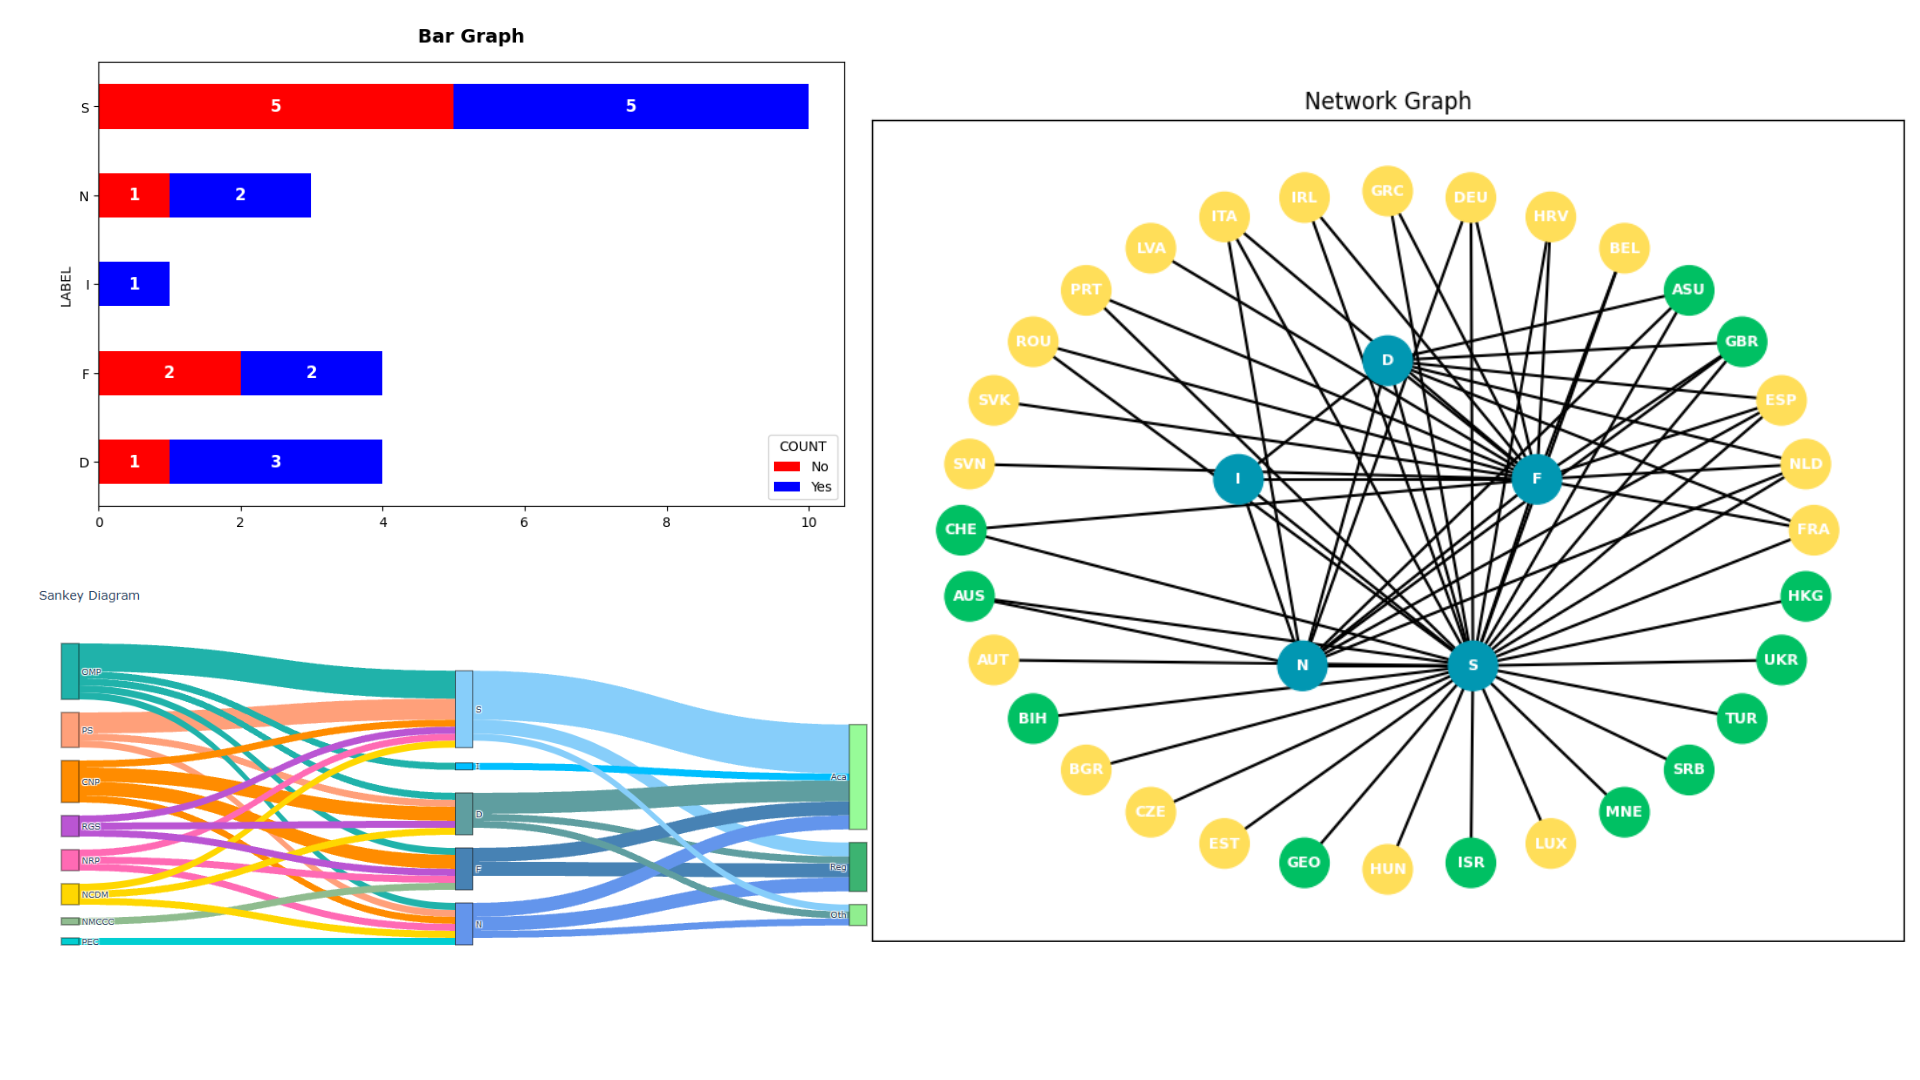

In [54]:
from IPython.display import Image

# Define the relative image path
IMAGE_PATH = './img/'  

# Display the image
display(Image(IMAGE_PATH + 'collated_graphs.png'))
